In [1]:
from whoscored import *
import json
import pandas as pd

In [2]:
BASE_DIR = os.path.join('..', 'data')
ENGINEERED_DIR = os.path.join(BASE_DIR, 'engineered')
SEASON_DIR = os.path.join(ENGINEERED_DIR, '2023')
MATCHES_DIR = os.path.join(SEASON_DIR, 'matches')

def get_data(round_match):
    data = None
    filepath = os.path.join(MATCHES_DIR, str(round_match), f"{round_match}_round.txt")
    with open(filepath, 'rt') as json_data_txt:
        data = json.loads(json_data_txt.read())
    return data

In [3]:
round_match = 9
data = get_data(round_match)
events_dict, players_df, teams_dict = extract_data_from_dict(data)
passes_df = get_passes_df(events_dict)


home_team_id = list(teams_dict.keys())[0]  # selected home team
home_passes_between_df, home_average_locs_and_count_df = get_passes_between_df(home_team_id, passes_df, players_df)

away_team_id = list(teams_dict.keys())[1]  # selected home team
away_passes_between_df, away_average_locs_and_count_df = get_passes_between_df(away_team_id, passes_df, players_df)


In [4]:
fluminense_players = players_df.loc[players_df['teamId'] == home_team_id]
ganso = fluminense_players.loc[fluminense_players['name'].str.contains('Ganso')].reset_index()
ganso_id = ganso['playerId'].loc[0]
ganso_id

40237

In [5]:
ganso_passes = passes_df.loc[passes_df['playerId'] == ganso_id]
ganso_passes

,id,x,y,endX,endY,teamId,playerId,receiver,eventType,outcomeType,match_period
8,2.558494e+09,64.5,33.4,64.3,25.6,1232,40237.0,373666.0,Pass,Successful,FirstHalf
12,2.558494e+09,68.7,28.9,71.9,23.3,1232,40237.0,337900.0,Pass,Successful,FirstHalf
14,2.558494e+09,91.2,3.8,78.0,7.1,1232,40237.0,280413.0,Pass,Successful,FirstHalf
42,2.558495e+09,8.8,51.8,7.8,73.0,1232,40237.0,13551.0,Pass,Successful,FirstHalf
65,2.558497e+09,32.8,28.3,27.5,22.6,1232,40237.0,397585.0,Pass,Successful,FirstHalf
92,2.558499e+09,60.9,35.6,70.9,34.0,1232,40237.0,424039.0,Pass,Successful,FirstHalf
98,2.558500e+09,81.8,5.3,88.5,5.3,1232,40237.0,337900.0,Pass,Successful,FirstHalf
118,2.558502e+09,29.7,13.4,20.1,39.7,1232,40237.0,13551.0,Pass,Successful,FirstHalf
185,2.558506e+09,42.7,92.5,54.0,87.2,1232,40237.0,321846.0,Pass,Successful,FirstHalf
194,2.558506e+09,60.6,81.5,70.7,95.4,1232,40237.0,321846.0,Pass,Successful,FirstHalf


In [6]:
ganso_passes.columns

Index(['id', 'x', 'y', 'endX', 'endY', 'teamId', 'playerId', 'receiver',
       'eventType', 'outcomeType', 'match_period'],
      dtype='object')

In [7]:
ganso_passes = ganso_passes.filter(['x', 'y', 'endX', 'endY', 'teamId', 'playerId', 'eventType', 'outcomeType', 'match_period']).reset_index(drop=True)
ganso_passes

,x,y,endX,endY,teamId,playerId,eventType,outcomeType,match_period
0,64.5,33.4,64.3,25.6,1232,40237.0,Pass,Successful,FirstHalf
1,68.7,28.9,71.9,23.3,1232,40237.0,Pass,Successful,FirstHalf
2,91.2,3.8,78.0,7.1,1232,40237.0,Pass,Successful,FirstHalf
3,8.8,51.8,7.8,73.0,1232,40237.0,Pass,Successful,FirstHalf
4,32.8,28.3,27.5,22.6,1232,40237.0,Pass,Successful,FirstHalf
5,60.9,35.6,70.9,34.0,1232,40237.0,Pass,Successful,FirstHalf
6,81.8,5.3,88.5,5.3,1232,40237.0,Pass,Successful,FirstHalf
7,29.7,13.4,20.1,39.7,1232,40237.0,Pass,Successful,FirstHalf
8,42.7,92.5,54.0,87.2,1232,40237.0,Pass,Successful,FirstHalf
9,60.6,81.5,70.7,95.4,1232,40237.0,Pass,Successful,FirstHalf


In [8]:
from mplsoccer import Pitch
from matplotlib import rcParams
import matplotlib.pyplot as plt

In [9]:

mask_complete = ganso_passes['outcomeType'] == 'Successful'

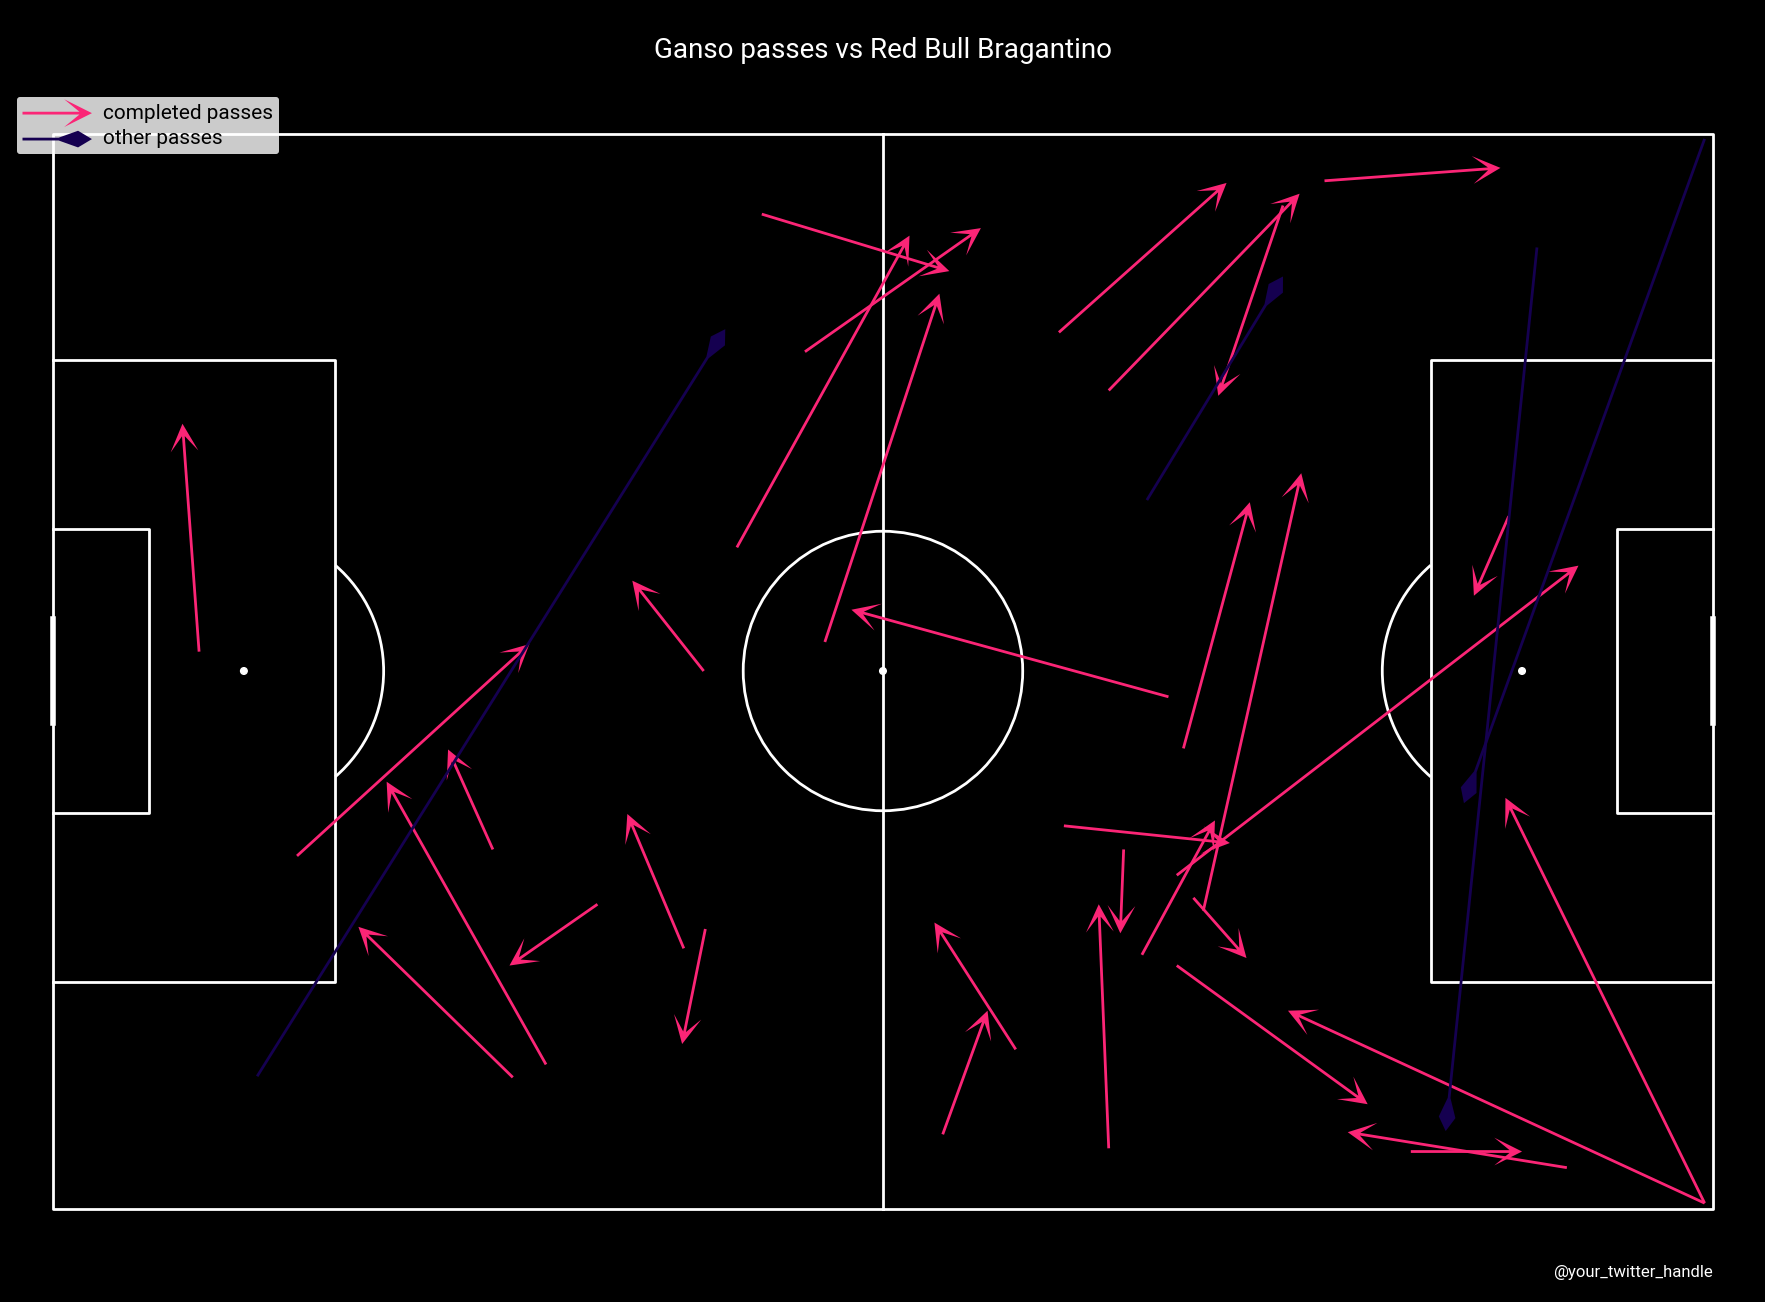

In [10]:
from utils import *
# Set up the pitch
pitch = Pitch(pitch_type='opta', pitch_color=COLORS_PALETTE_13["bkg"], line_color='#ffff')


fig, axs = pitch.grid(endnote_height=0.03, endnote_space=0, figheight=13.5,
                      title_height=0.06, title_space=0, grid_height=0.86,
                      # Turn off the endnote/title axis. I usually do this after
                      # I am happy with the chart layout and text placement
                      axis=False)
fig.set_facecolor(COLORS_PALETTE_13["bkg"])

# Plot the completed passes
pitch.arrows(ganso_passes[mask_complete]['x'], ganso_passes[mask_complete]['y'],
             ganso_passes[mask_complete]['endX'], ganso_passes[mask_complete]['endY'], width=2, headwidth=10,
             headlength=10, color=COLORS_PALETTE_13["color3"], ax=axs['pitch'], label='completed passes')

# Plot the other passes
pitch.arrows(ganso_passes[~mask_complete]['x'], ganso_passes[~mask_complete]['x'],
             ganso_passes[~mask_complete]['endX'], ganso_passes[~mask_complete]['endY'], width=2,
             headwidth=6, headlength=5, headaxislength=12,
             color=COLORS_PALETTE_13["color1"], ax=axs['pitch'], label='other passes')

# fontmanager for Google font (robotto)
robotto_regular = FONT_ROBOTO

# Set up the legend
legend = axs['pitch'].legend(facecolor='#ffff', handlelength=5, edgecolor='None',
                             prop=robotto_regular, loc='upper left')
for text in legend.get_texts():
    text.set_fontsize(15)

# endnote and title
axs['endnote'].text(1, 0.5, '@your_twitter_handle', va='center', ha='right', fontsize=12,
                    fontproperties=robotto_regular, color='#ffff')
axs['title'].text(0.5, 0.5, f'Ganso passes vs {list(teams_dict.values())[1] }', color='#ffff',
                  va='center', ha='center',
                  fontproperties=robotto_regular, fontsize=20)

plt.show()  # If you are using a Jupyter notebook you do not need this line

In [11]:
shots_df = get_shots_df(events_dict)


In [12]:
fluminense_players = players_df.loc[players_df['teamId'] == home_team_id]
cano = fluminense_players.loc[fluminense_players['name'].str.contains('Cano')].reset_index()
cano_id = cano['playerId'].loc[0]
cano_id

397899

In [13]:
cano_shots = shots_df.loc[shots_df['playerId'] == cano_id]
cano_shots.head(5)

,id,eventId,minute,second,teamId,x,y,expandedMinute,outcomeType,qualifiers,...,relatedEventId,relatedPlayerId,blockedX,blockedY,goalMouthZ,goalMouthY,isShot,isGoal,eventType,match_period
7,2.558514e+09,275,27,57.0,1232,78.2,45.0,27,Successful,"[{'type': {'value': 75, 'displayName': 'MissRi...",...,276.0,397585.0,NaN,NaN,15.3,40.2,True,NaN,MissedShots,FirstHalf
9,2.558516e+09,290,31,2.0,1232,45.3,44.5,31,Successful,"[{'type': {'value': 102, 'displayName': 'GoalM...",...,289.0,397585.0,93.6,49.5,15.8,51.8,True,NaN,SavedShot,FirstHalf
12,2.558526e+09,391,43,41.0,1232,85.6,57.0,43,Successful,"[{'type': {'value': 78, 'displayName': 'LowCen...",...,390.0,40237.0,88.5,55.6,19.0,50.0,True,NaN,SavedShot,FirstHalf


In [14]:
cano_shots.columns

Index(['id', 'eventId', 'minute', 'second', 'teamId', 'x', 'y',
       'expandedMinute', 'outcomeType', 'qualifiers', 'satisfiedEventsTypes',
       'isTouch', 'playerId', 'endX', 'endY', 'cardType', 'relatedEventId',
       'relatedPlayerId', 'blockedX', 'blockedY', 'goalMouthZ', 'goalMouthY',
       'isShot', 'isGoal', 'eventType', 'match_period'],
      dtype='object')

In [15]:
cano_shots = cano_shots.filter(['x', 'y','endX', 'endY','playerId','isShot', 'isGoal'])
cano_shots

,x,y,endX,endY,playerId,isShot,isGoal
7,78.2,45.0,NaN,NaN,397899.0,True,NaN
9,45.3,44.5,NaN,NaN,397899.0,True,NaN
12,85.6,57.0,NaN,NaN,397899.0,True,NaN


In [16]:
mask_goal = cano_shots['isGoal'] == True

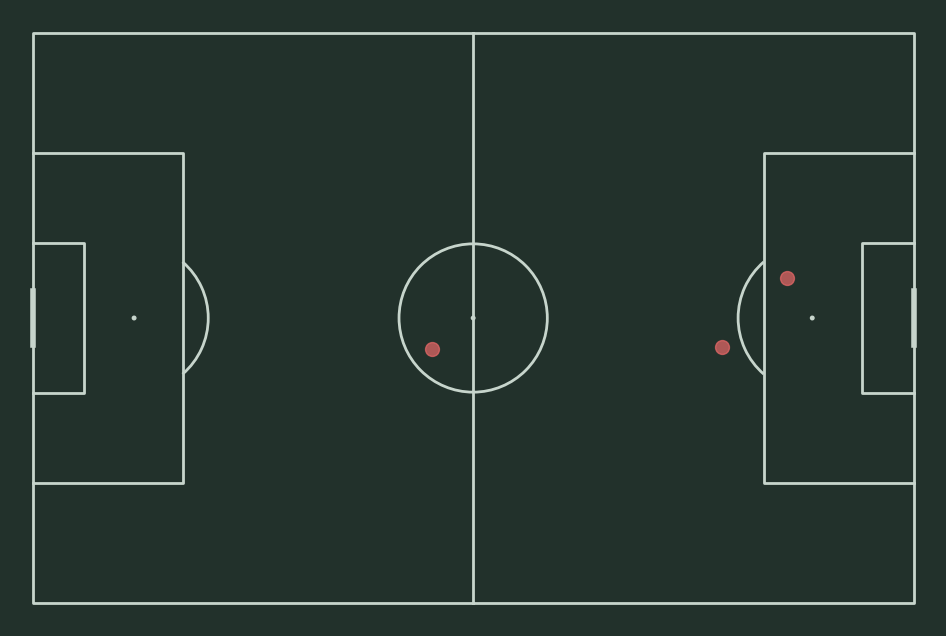

In [17]:
fig, ax = plt.subplots(figsize=(13.5, 8))
pitch = Pitch(pitch_type='opta', pitch_color='#22312b', line_color='#c7d5cc' )
fig.set_facecolor('#22312b')
ax.set_facecolor('#22312b')
pitch.draw(ax=ax, constrained_layout=True, tight_layout=False)
plt.scatter(x=cano_shots["x"], y=cano_shots["y"], s=100, alpha=.7, c='#ea6969')


In [18]:
events_df = get_event_type_df(events_dict)

In [19]:
touches_df = get_touchs_df(events_dict)
touches_df

,id,x,y,endX,endY,teamId,playerId,eventType,outcomeType,match_period,minute,second,isTouch
0,2.558494e+09,50.1,49.7,38.2,44.1,1232,397899.0,Pass,Successful,FirstHalf,0,0.0,True
1,2.558494e+09,40.9,40.4,30.9,55.3,1232,397585.0,Pass,Successful,FirstHalf,0,21.0,True
2,2.558532e+09,27.1,55.7,22.9,32.2,1232,13551.0,Pass,Successful,FirstHalf,0,23.0,True
3,2.558494e+09,25.9,24.1,67.6,19.3,1232,373523.0,Pass,Unsuccessful,FirstHalf,0,26.0,True
4,2.558494e+09,30.2,75.9,NaN,NaN,5438,389176.0,BallTouch,Successful,FirstHalf,0,29.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1214,2.558564e+09,29.5,72.3,NaN,NaN,1232,295008.0,BallTouch,Successful,SecondHalf,95,58.0,True
1215,2.558564e+09,65.5,8.9,63.4,10.0,5438,460759.0,Pass,Unsuccessful,SecondHalf,96,1.0,True
1216,2.558564e+09,31.1,90.5,NaN,NaN,1232,424039.0,BallTouch,Successful,SecondHalf,96,1.0,True
1217,2.558564e+09,64.6,31.8,92.3,72.7,5438,366498.0,Pass,Unsuccessful,SecondHalf,96,4.0,True


In [20]:
andre = fluminense_players.loc[fluminense_players['name'].str.contains('André')].reset_index()
andre_id = andre['playerId'].loc[0]
andre_touch = touches_df.loc[touches_df['playerId'] == andre_id]
andre_touch

,id,x,y,endX,endY,teamId,playerId,eventType,outcomeType,match_period,minute,second,isTouch
1,2.558494e+09,40.9,40.4,30.9,55.3,1232,397585.0,Pass,Successful,FirstHalf,0,21.0,True
10,2.558494e+09,59.8,30.4,64.3,33.4,1232,397585.0,Pass,Successful,FirstHalf,0,36.0,True
15,2.558494e+09,61.2,19.3,68.6,29.3,1232,397585.0,Pass,Successful,FirstHalf,0,42.0,True
23,2.558494e+09,66.7,33.2,62.1,61.8,1232,397585.0,Pass,Successful,FirstHalf,1,13.0,True
25,2.558494e+09,50.6,17.5,NaN,NaN,1232,397585.0,Foul,Successful,FirstHalf,1,20.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,2.558559e+09,26.4,42.5,NaN,NaN,1232,397585.0,BallTouch,Successful,SecondHalf,86,35.0,True
1110,2.558560e+09,57.7,83.4,55.5,93.9,1232,397585.0,Pass,Successful,SecondHalf,86,46.0,True
1114,2.558560e+09,32.3,76.5,12.0,55.7,1232,397585.0,Pass,Successful,SecondHalf,87,4.0,True
1118,2.558560e+09,30.0,83.9,29.0,91.8,1232,397585.0,Pass,Successful,SecondHalf,87,17.0,True


In [21]:
andre_df = andre_touch.filter(['x', 'y'])
andre_df

,x,y
1,40.9,40.4
10,59.8,30.4
15,61.2,19.3
23,66.7,33.2
25,50.6,17.5
...,...,...
1107,26.4,42.5
1110,57.7,83.4
1114,32.3,76.5
1118,30.0,83.9


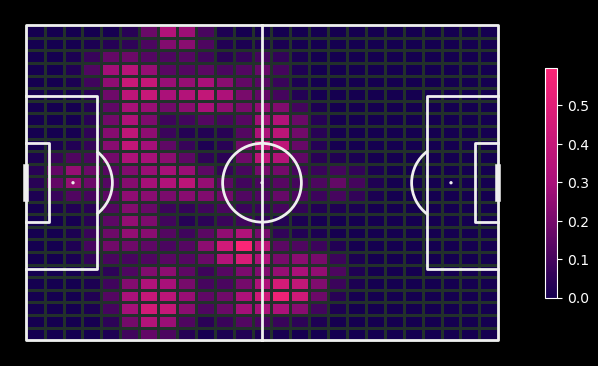

In [22]:
from matplotlib.colors import LinearSegmentedColormap
from scipy.ndimage import gaussian_filter
# setup pitch
pitch = Pitch(pitch_type='statsbomb', line_zorder=2,
              pitch_color=COLORS_PALETTE_13["bkg"], line_color='#efefef')
# draw

custom_color = [(0, COLORS_PALETTE_13["color1"]), (0.5, COLORS_PALETTE_13["color2"]), (1, COLORS_PALETTE_13["color3"])]
custom_cmap = LinearSegmentedColormap.from_list('custom_map', custom_color)


fig, ax = pitch.draw(figsize=(6.6, 4.125))
fig.set_facecolor(COLORS_PALETTE_13["bkg"])
bin_statistic = pitch.bin_statistic(andre_df.x, andre_df.y, statistic='count', bins=(25, 25))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax, cmap=custom_cmap, edgecolors='#22312b')
# Add the colorbar and format off-white
cbar = fig.colorbar(pcm, ax=ax, shrink=0.6)
cbar.outline.set_edgecolor("#ffff")
cbar.ax.yaxis.set_tick_params(color="#ffff")
ticks = plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color="#ffff")

In [23]:
flu_passes = passes_df.loc[passes_df['teamId'] == home_team_id]
mask_complete = flu_passes['outcomeType'] == 'Successful'

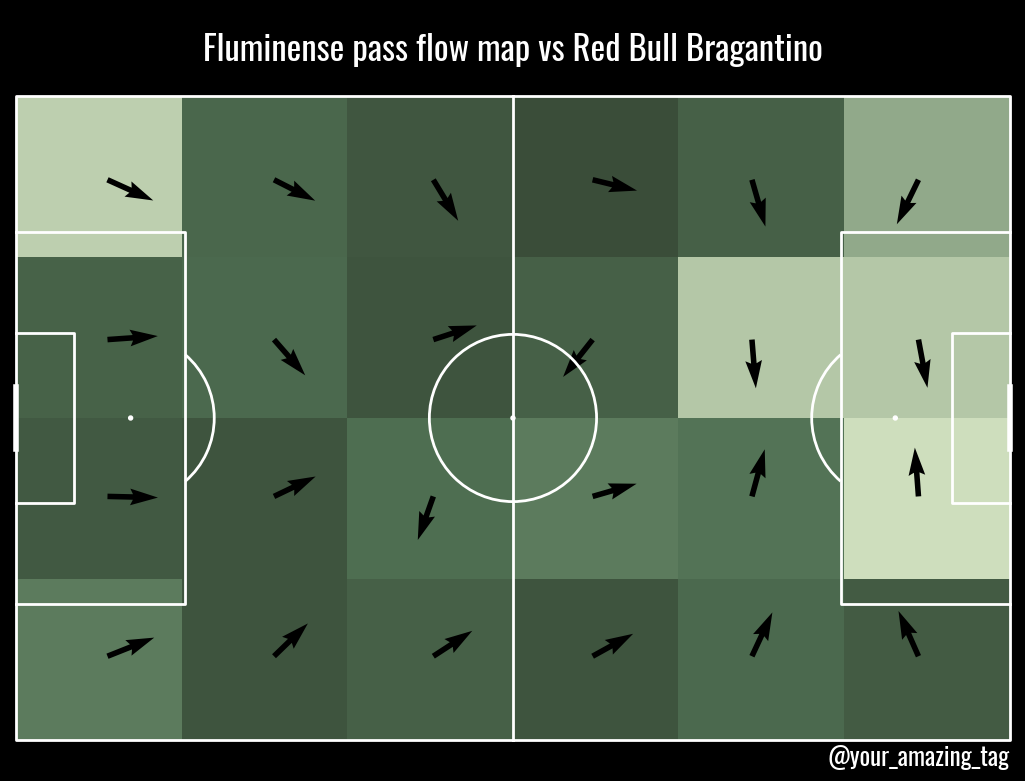

In [24]:
pitch = Pitch(pitch_type='opta', pad_bottom=1, pad_top=1,
              pad_left=1, pad_right=1,
              line_zorder=2, line_color='#ffff', pitch_color=COLORS_PALETTE_12["bkg"])
fig, axs = pitch.grid(figheight=8, endnote_height=0.03, endnote_space=0,
                      title_height=0.1, title_space=0, grid_height=0.82,
                      # Turn off the endnote/title axis. I usually do this after
                      # I am happy with the chart layout and text placement
                      axis=False)
fig.set_facecolor(COLORS_PALETTE_12["bkg"])
bins = (6, 4)
# plot the heatmap - darker colors = more passes originating from that square
bs_heatmap = pitch.bin_statistic(flu_passes["x"], flu_passes["y"], statistic='count', bins=bins)
hm = pitch.heatmap(bs_heatmap, ax=axs['pitch'], cmap=CUSTOM_CMP_1)
# plot the pass flow map with a single color ('black') and length of the arrow (5)
fm = pitch.flow(flu_passes["x"], flu_passes["y"], flu_passes["endX"], flu_passes["endY"],
                color='black', arrow_type='same',
                arrow_length=5, bins=bins, ax=axs['pitch'])

# title / endnote
font = FONT_OSWALD  # default is loading robotto font from google fonts
axs['title'].text(0.5, 0.5, f'{list(teams_dict.values())[0]} pass flow map vs {list(teams_dict.values())[1]}',
                  fontsize=25, fontproperties=font, va='center', ha='center', color="#ffff")
axs['endnote'].text(1, 0.5, '@your_amazing_tag',
                    fontsize=18, fontproperties=font, va='center', ha='right', color="#ffff")

plt.show()  # If you are using a Jupyter notebook you do not need this line

In [63]:
passes_df = get_passes_df(events_dict)
passes_df.loc[0]

id                                                   2558493573.0
x                                                            50.1
y                                                            49.7
endX                                                         38.2
endY                                                         44.1
teamId                                                       1232
playerId                                                 397899.0
receiver                                                 397585.0
eventType                                                    Pass
outcomeType                                            Successful
match_period                                            FirstHalf
angle                                                        3.44
length                                                       13.1
qualifiers      [{'type': {'value': 141, 'displayName': 'PassE...
Name: 0, dtype: object